In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# načítanie súborov
connections = pd.read_csv("raw_data/connections.csv", delimiter="\t")
devices = pd.read_csv("raw_data/devices.csv", delimiter="\t")
processes = pd.read_csv("raw_data/processes.csv", delimiter="\t")
profiles = pd.read_csv("raw_data/profiles.csv", delimiter="\t")

## Posledne zmeny v sekcii: B
 - Pridane univariate analýzy pre vybrane columny
 - Tie columny som nakoniec vybral tak, že som urobil kopie povodnych df, čiže tie povodne df su stale available
 - Tieto kopie som mergol pomocou toho postupu co si robil predtym ty
 - Mode mi este nefunguje, neviem preco
 - -----------------------------------
 - pridanie štatistík aj pre kategorické dáta
 - menšie úpravy v premenných
 - pridal som boxploty pre numerické stĺpce
 - pridal som deskriptívne štatistiky pre numerické aj kategorické stĺpce
 - spravil som párovú analýzu pre dáta typu: continuous - continuous cez korelácie
 - spravil som funkciu na výpis boxplotov pre párovú analýzu pre dáta typu: continuous - categorical, ale je zakomentovaná, pretože beží hrozne dlho (treba to nejak opraviť ešte)

# 1.1 Základný opis dát spolu s ich charakteristikami

## A

Analýza štruktúr dát ako súbory (štruktúry a vzťahy, počet, typy, …), záznamy
(štruktúry, počet záznamov, počet atribútov, typy, …)

### Connections

In [3]:
connections.head()

,ts,imei,mwra,c.dogalize,c.android.gm,c.android.chrome,c.android.youtube,c.katana,c.updateassist,c.UCMobile.x86,c.android.vending,c.raider,c.UCMobile.intl
0,2018-05-05 10:00:00,3590433799317661966,1.0,9.03970,14.35315,13.76020,11.12559,6.73850,66.91554,54.28226,16.75773,4.64834,30.67838
1,2018-05-05 10:01:00,3590433799317661073,1.0,9.41478,7.51650,12.31292,12.55000,7.19936,32.67809,64.59178,29.13667,28.68688,59.46351
2,2018-05-05 10:02:00,359043379931766445,0.0,13.25806,7.23549,10.30754,7.77630,13.17780,55.29738,36.98063,65.83367,73.22975,37.54590
3,2018-05-05 10:03:00,3590433799317662014,0.0,11.41695,8.09047,8.96150,9.97905,11.82898,38.55251,46.93124,58.06052,15.85001,36.53092
4,2018-05-05 10:04:00,3590433799317661651,0.0,12.47250,9.28802,8.48795,8.60786,11.82816,43.46316,43.94921,47.15770,39.61245,38.15171


In [4]:
connections.shape

(15082, 13)

In [5]:
connections.columns

Index(['ts', 'imei', 'mwra', 'c.dogalize', 'c.android.gm', 'c.android.chrome',
       'c.android.youtube', 'c.katana', 'c.updateassist', 'c.UCMobile.x86',
       'c.android.vending', 'c.raider', 'c.UCMobile.intl'],
      dtype='object')

In [6]:
connections.dtypes

ts                    object
imei                   int64
mwra                 float64
c.dogalize           float64
c.android.gm         float64
c.android.chrome     float64
c.android.youtube    float64
c.katana             float64
c.updateassist       float64
c.UCMobile.x86       float64
c.android.vending    float64
c.raider             float64
c.UCMobile.intl      float64
dtype: object

In [7]:
connections.isnull().sum()

ts                   0
imei                 0
mwra                 0
c.dogalize           0
c.android.gm         0
c.android.chrome     0
c.android.youtube    0
c.katana             0
c.updateassist       0
c.UCMobile.x86       0
c.android.vending    0
c.raider             0
c.UCMobile.intl      0
dtype: int64

In [8]:
connections.shape[0] - connections.dropna().shape[0]

0

In [9]:
connections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15082 entries, 0 to 15081
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15082 non-null  object 
 1   imei               15082 non-null  int64  
 2   mwra               15082 non-null  float64
 3   c.dogalize         15082 non-null  float64
 4   c.android.gm       15082 non-null  float64
 5   c.android.chrome   15082 non-null  float64
 6   c.android.youtube  15082 non-null  float64
 7   c.katana           15082 non-null  float64
 8   c.updateassist     15082 non-null  float64
 9   c.UCMobile.x86     15082 non-null  float64
 10  c.android.vending  15082 non-null  float64
 11  c.raider           15082 non-null  float64
 12  c.UCMobile.intl    15082 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


### Devices

In [10]:
devices.head()

,latitude,longitude,store_name,code,location,imei
0,37.73222,115.70111,Hengshui,CN,Asia/Shanghai,359043379931766668
1,36.46917,10.78222,Beni Khiar,TN,Africa/Tunis,3590433799317661669
2,43.61092,3.87723,Montpellier,FR,Europe/Paris,359043379931766767
3,20.88953,-156.47432,Kahului,US,Pacific/Honolulu,359043379931766502
4,42.81900,47.11920,Buynaksk,RU,Europe/Moscow,3590433799317661370


In [11]:
devices.shape

(2903, 6)

In [12]:
devices.columns

Index(['latitude', 'longitude', 'store_name', 'code', 'location', 'imei'], dtype='object')

In [13]:
devices.dtypes

latitude      float64
longitude     float64
store_name     object
code           object
location       object
imei            int64
dtype: object

In [14]:
devices.isnull().sum()

latitude      0
longitude     0
store_name    0
code          4
location      0
imei          0
dtype: int64

In [15]:
devices.shape[0] - devices.dropna().shape[0]

4

In [16]:
devices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2903 non-null   float64
 1   longitude   2903 non-null   float64
 2   store_name  2903 non-null   object 
 3   code        2899 non-null   object 
 4   location    2903 non-null   object 
 5   imei        2903 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 136.2+ KB


### Processes

In [17]:
processes.head()

,ts,imei,mwra,p.android.gm,p.android.externalstorage,p.android.documentsui,p.system,p.android.settings,p.android.packageinstaller,p.android.chrome,...,p.dogalize,p.inputmethod.latin,p.simulator,p.android.gms,p.android.vending,p.katana,p.process.gapps,p.google,p.olauncher,p.browser.provider
0,2018-05-05 10:00:00,3590433799317661966,1.0,13.08147,6.26446,7.97092,11.24427,11.08966,8.23662,11.58103,...,42.19751,79.40836,45.40991,87.15437,51.41012,69.25298,20.06545,13.62688,21.52231,84.08213
1,2018-05-05 10:01:00,3590433799317661073,1.0,9.52577,13.15723,10.12613,14.37023,14.36103,5.40400,7.72424,...,53.72498,39.27139,13.21933,74.91757,30.24281,53.84815,21.26466,7.85091,1.76933,40.47904
2,2018-05-05 10:02:00,359043379931766445,0.0,11.23775,13.43689,12.58645,7.63430,12.54228,12.04773,7.86555,...,43.77214,36.49072,86.97079,96.17420,7.71312,78.90782,8.32312,41.12966,75.38385,68.61776
3,2018-05-05 10:03:00,3590433799317662014,0.0,6.02527,11.05170,12.42098,16.98137,11.35344,11.37062,10.67391,...,55.74452,48.78629,9.34253,63.25140,61.82840,43.90015,83.45260,61.63458,13.99080,62.90951
4,2018-05-05 10:04:00,3590433799317661651,0.0,4.97925,11.86770,10.20366,15.33645,11.64182,12.93403,10.25430,...,17.59833,49.69782,7.07021,73.27845,46.34725,91.91502,19.71363,12.49803,80.71499,3.93994


In [18]:
processes.shape

(15082, 23)

In [19]:
processes.columns

Index(['ts', 'imei', 'mwra', 'p.android.gm', 'p.android.externalstorage',
       'p.android.documentsui', 'p.system', 'p.android.settings',
       'p.android.packageinstaller', 'p.android.chrome',
       'p.android.defcontainer', 'p.gms.persistent', 'p.notifier',
       'p.dogalize', 'p.inputmethod.latin', 'p.simulator', 'p.android.gms',
       'p.android.vending', 'p.katana', 'p.process.gapps', 'p.google',
       'p.olauncher', 'p.browser.provider'],
      dtype='object')

In [20]:
processes.dtypes

ts                             object
imei                            int64
mwra                          float64
p.android.gm                  float64
p.android.externalstorage     float64
p.android.documentsui         float64
p.system                      float64
p.android.settings            float64
p.android.packageinstaller    float64
p.android.chrome              float64
p.android.defcontainer        float64
p.gms.persistent              float64
p.notifier                    float64
p.dogalize                    float64
p.inputmethod.latin           float64
p.simulator                   float64
p.android.gms                 float64
p.android.vending             float64
p.katana                      float64
p.process.gapps               float64
p.google                      float64
p.olauncher                   float64
p.browser.provider            float64
dtype: object

In [21]:
processes.isnull().sum()

ts                            0
imei                          0
mwra                          0
p.android.gm                  0
p.android.externalstorage     0
p.android.documentsui         0
p.system                      0
p.android.settings            0
p.android.packageinstaller    0
p.android.chrome              0
p.android.defcontainer        0
p.gms.persistent              0
p.notifier                    0
p.dogalize                    0
p.inputmethod.latin           0
p.simulator                   0
p.android.gms                 0
p.android.vending             0
p.katana                      0
p.process.gapps               0
p.google                      0
p.olauncher                   0
p.browser.provider            0
dtype: int64

In [22]:
processes.shape[0] - processes.dropna().shape[0]

0

In [23]:
processes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15082 entries, 0 to 15081
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15082 non-null  object 
 1   imei                        15082 non-null  int64  
 2   mwra                        15082 non-null  float64
 3   p.android.gm                15082 non-null  float64
 4   p.android.externalstorage   15082 non-null  float64
 5   p.android.documentsui       15082 non-null  float64
 6   p.system                    15082 non-null  float64
 7   p.android.settings          15082 non-null  float64
 8   p.android.packageinstaller  15082 non-null  float64
 9   p.android.chrome            15082 non-null  float64
 10  p.android.defcontainer      15082 non-null  float64
 11  p.gms.persistent            15082 non-null  float64
 12  p.notifier                  15082 non-null  float64
 13  p.dogalize                  150

### Profiles

In [24]:
profiles.head()

,birthdate,user_id,registration,company,job,mail,residence,imei,current_location,username,ssn,name
0,NaN,847,2019/11/21,Mitchell-Solis,NaN,timothytaylor@yahoo.com,NaN,8630330696303481933,"(Decimal('-20.2706735'), Decimal('157.457919'))",aaron53,616-47-8424,Michael Wilson
1,NaN,1161,2022-11-08,"Gonzales, Ingram and Sanchez",Geophysical data processor,gonzalezmichael@gmail.com,NaN,8630330696303481099,"(Decimal('-53.811515'), Decimal('24.770391'))",nicole50,537-31-1859,James Long
2,1940-10-02,1255,"06/04/2018, 00:00:00",Rowland LLC,NaN,sarahgreene@yahoo.com,NaN,3590433799317661909,"(Decimal('79.3383185'), Decimal('19.887697'))",amber66,427-45-3074,Keith Donovan
3,NaN,2069,2021-01-19,Pearson PLC,NaN,destinyholland@gmail.com,NaN,3590433799317661008,"(Decimal('-39.788237'), Decimal('115.687134'))",dana32,286-31-2534,Stephanie Bell
4,NaN,1648,21 Jan 2022,English LLC,NaN,thomas78@hotmail.com,"71251 Conway Divide Suite 608\nNorth Zachary, ...",359043379931766775,"(Decimal('16.925840'), Decimal('-82.703519'))",cbutler,252-18-1389,Randy Rodriguez


In [25]:
profiles.shape

(2597, 12)

In [26]:
profiles.columns

Index(['birthdate', 'user_id', 'registration', 'company', 'job', 'mail',
       'residence', 'imei', 'current_location', 'username', 'ssn', 'name'],
      dtype='object')

In [27]:
profiles.dtypes

birthdate           object
user_id              int64
registration        object
company             object
job                 object
mail                object
residence           object
imei                 int64
current_location    object
username            object
ssn                 object
name                object
dtype: object

In [28]:
profiles.isnull().sum()

birthdate           1169
user_id                0
registration           0
company                0
job                 1818
mail                   0
residence           1688
imei                   0
current_location     130
username               0
ssn                    0
name                   0
dtype: int64

In [29]:
profiles.shape[0] - profiles.dropna().shape[0]

2463

In [30]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   birthdate         1428 non-null   object
 1   user_id           2597 non-null   int64 
 2   registration      2597 non-null   object
 3   company           2597 non-null   object
 4   job               779 non-null    object
 5   mail              2597 non-null   object
 6   residence         909 non-null    object
 7   imei              2597 non-null   int64 
 8   current_location  2467 non-null   object
 9   username          2597 non-null   object
 10  ssn               2597 non-null   object
 11  name              2597 non-null   object
dtypes: int64(2), object(10)
memory usage: 243.6+ KB


## B

Analýza jednotlivých atribútov: pre zvolené významné atribúty (min 10) analyzujte
ich distribúcie a základné deskriptívne štatistiky.

### Výber relevantných stĺpcov

In [31]:
columns_to_drop = ["c.android.vending", "c.raider", "c.UCMobile.intl"]
relevant_connections = connections.drop(columns=columns_to_drop)
columns_to_drop = ["latitude", "longitude"]
relevant_devices = devices.drop(columns=columns_to_drop)
columns_to_drop = ["p.inputmethod.latin", "p.simulator", "p.android.gms", "p.android.vending", "p.katana", "p.process.gapps", "p.google", "p.olauncher", "p.browser.provider"]
relevant_processes = processes.drop(columns=columns_to_drop)
columns_to_drop = ["birthdate", "user_id", "registration", "job", "mail", "residence", "current_location", "username", "ssn", "name"]
relevant_profiles = profiles.drop(columns=columns_to_drop)

merged_con_dev = pd.merge(relevant_connections, relevant_devices, on="imei", how="outer")
merged_con_dev_proc = pd.merge(merged_con_dev, relevant_processes, on=["imei", "mwra", "ts"], how="outer")
merged_data = pd.merge(merged_con_dev_proc, relevant_profiles, on="imei", how="outer")

"""
numeric_columns = [
    'c.dogalize', 'c.android.gm', 'c.android.chrome', 
    'c.android.youtube', 'c.katana', 'c.updateassist', 
    'c.UCMobile.x86', 'p.android.gm', 'p.android.externalstorage', 
    'p.android.documentsui', 'p.system', 'p.android.settings', 
    'p.android.packageinstaller', 'p.android.chrome', 
    'p.android.defcontainer', 'p.gms.persistent', 
    'p.notifier', 'p.dogalize'
]

categorical_columns = [
    "ts", "store_name", "code", "location", "company"
]
"""

numeric_columns = merged_data.select_dtypes(include=['number'])
categorical_columns = merged_data.select_dtypes(exclude=['number'])

columns = numeric_columns + categorical_columns

### Počty kategorických stĺpcov

In [32]:
for col in categorical_columns:
    print(merged_data[col].value_counts())
    print("\n")

ts
2018-05-14 13:43:00    384
2018-05-08 17:55:00    288
2018-05-13 05:43:00    288
2018-05-15 09:37:00    288
2018-05-14 06:23:00    288
                      ... 
2018-05-05 11:54:00      1
2018-05-14 18:47:00      1
2018-05-11 04:21:00      1
2018-05-10 05:28:00      1
2018-05-10 17:51:00      1
Name: count, Length: 14903, dtype: int64


store_name
Zacoalco de Torres    1592
Mokopane              1590
Moga                  1528
Hudiksvall            1477
Jalal-Abad            1433
                      ... 
Lodwar                  46
Carlos Barbosa          44
Landshut                31
Ushuaia                 29
Barbil                  29
Name: count, Length: 917, dtype: int64


code
US    74987
IN    32747
RU    25388
DE    23998
BR    19107
      ...  
DO      112
HN      104
RW       96
GM       88
PG       80
Name: count, Length: 133, dtype: int64


location
America/New_York             32899
Asia/Kolkata                 32747
Europe/Berlin                23998
America/Chicago 

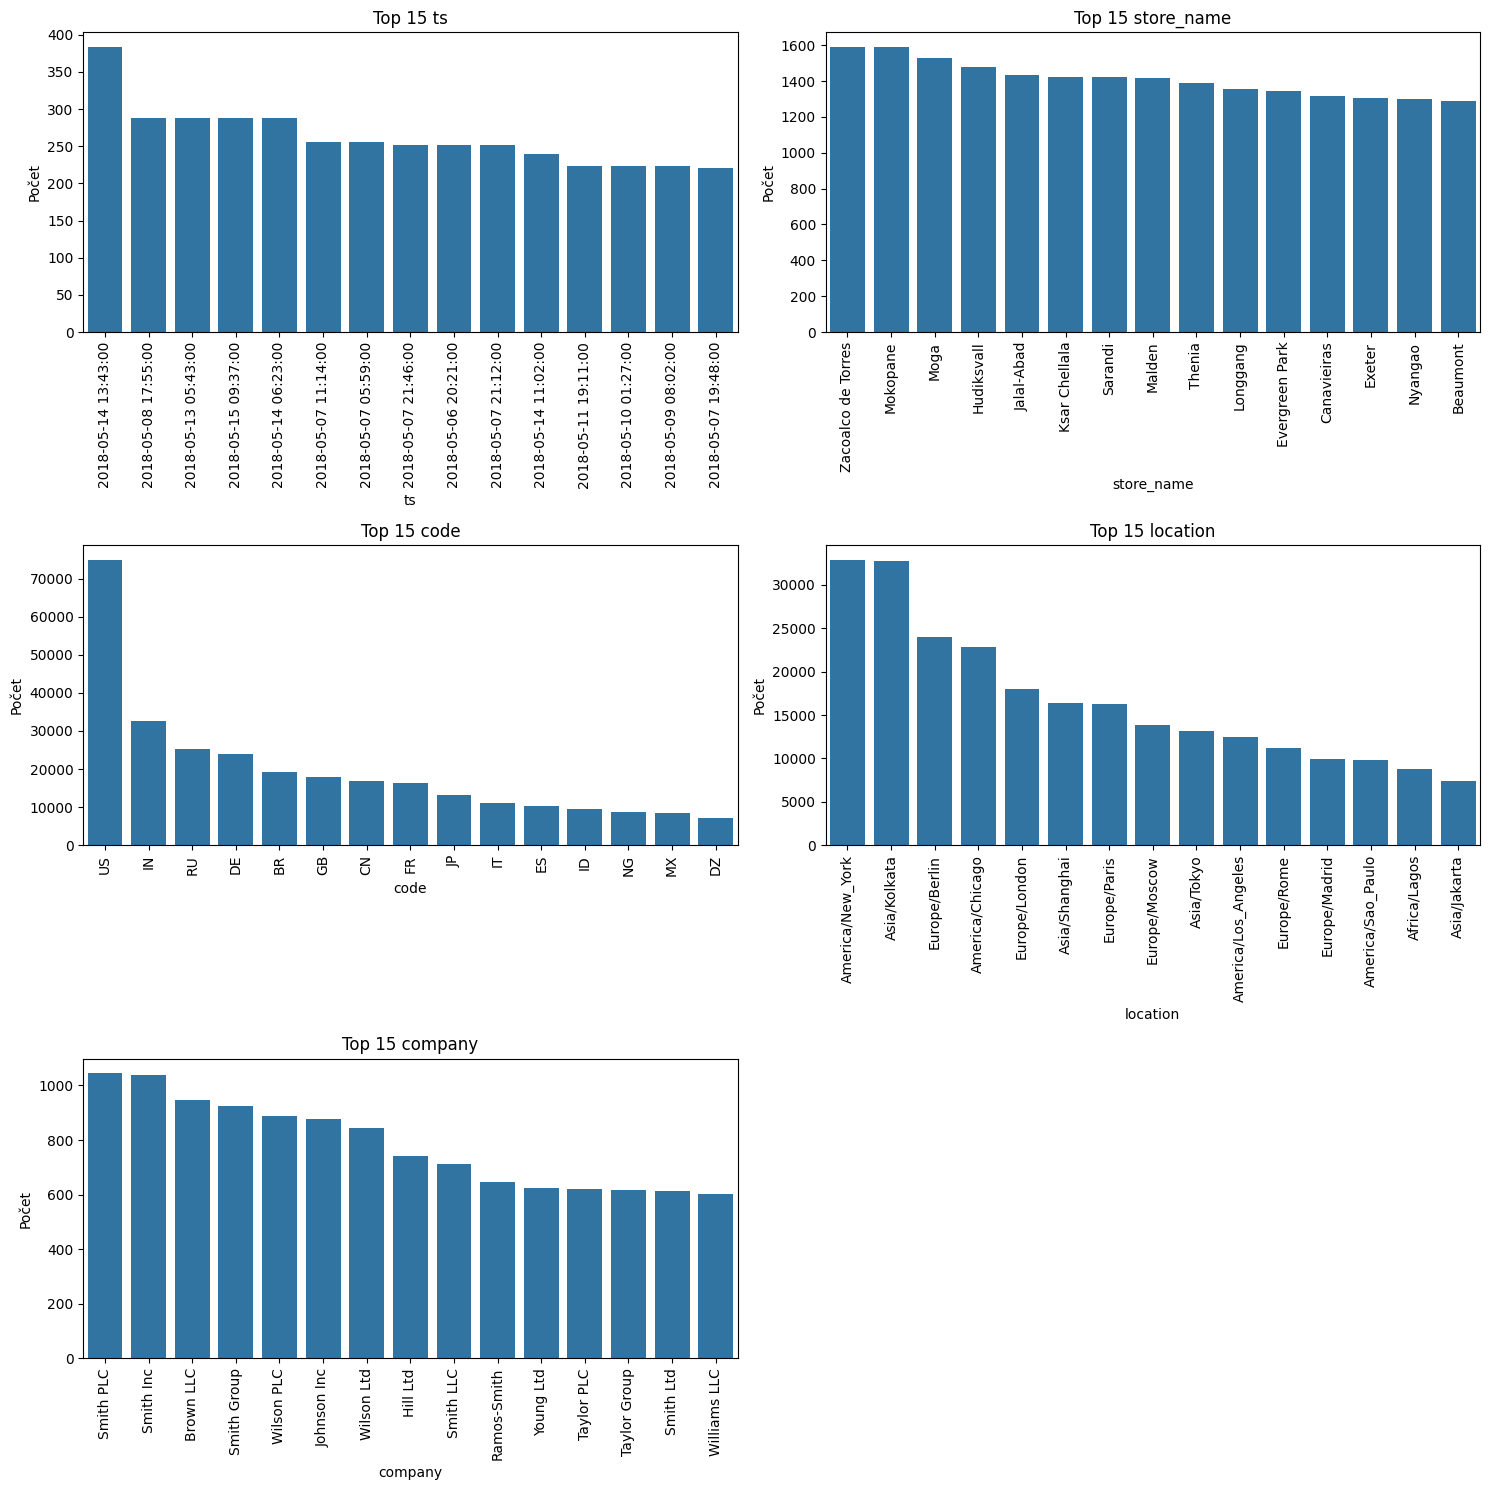

In [33]:
cat_col = categorical_columns.columns
num_plots = len(cat_col)
num_cols = 2
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(cat_col):
    sns.countplot(x=col, data=merged_data, order=merged_data[col].value_counts().index[:15], ax=axes[i])
    axes[i].set_title(f'Top 15 {col}')
    axes[i].set_ylabel('Počet')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=90)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Histogramy pre numerické stĺpce 

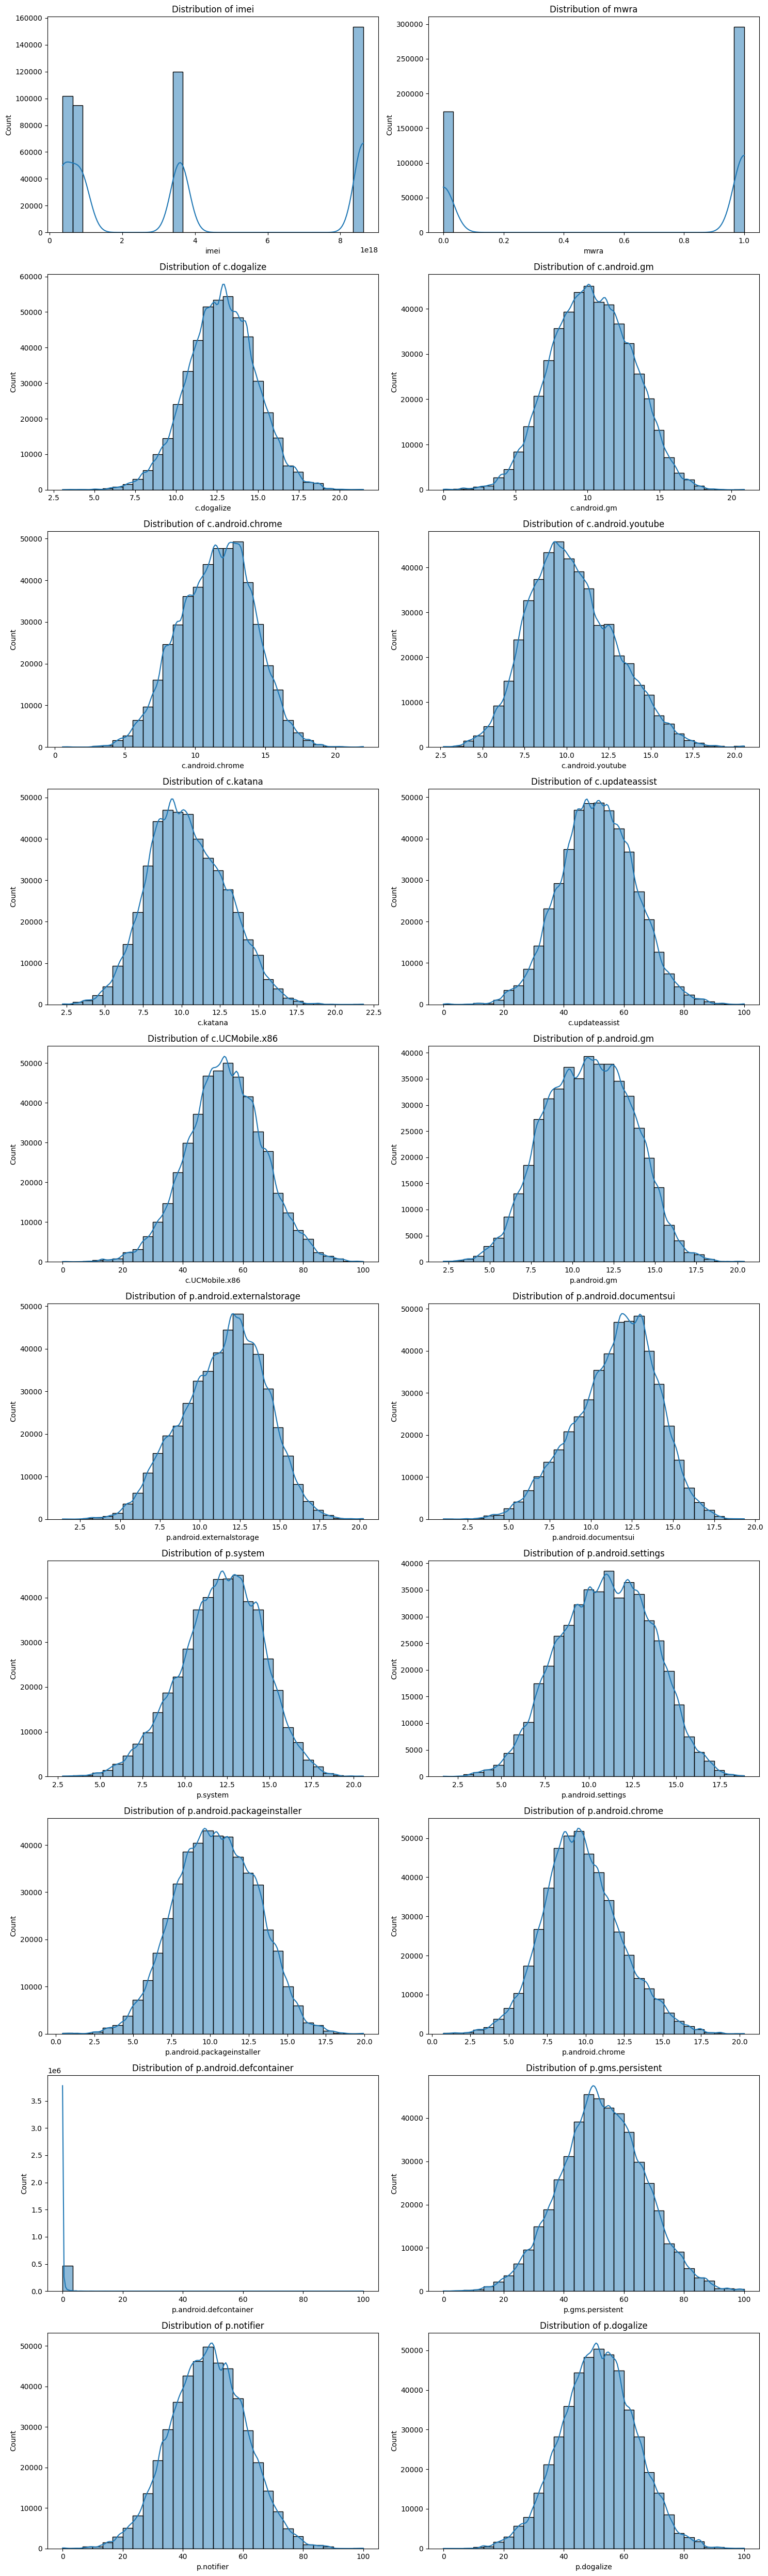

In [34]:
#merged_data.hist(bins=10, figsize=(18, 13))
num_col = numeric_columns.columns
num_plots = len(num_col)
num_cols = 2
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0) 

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(merged_data[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

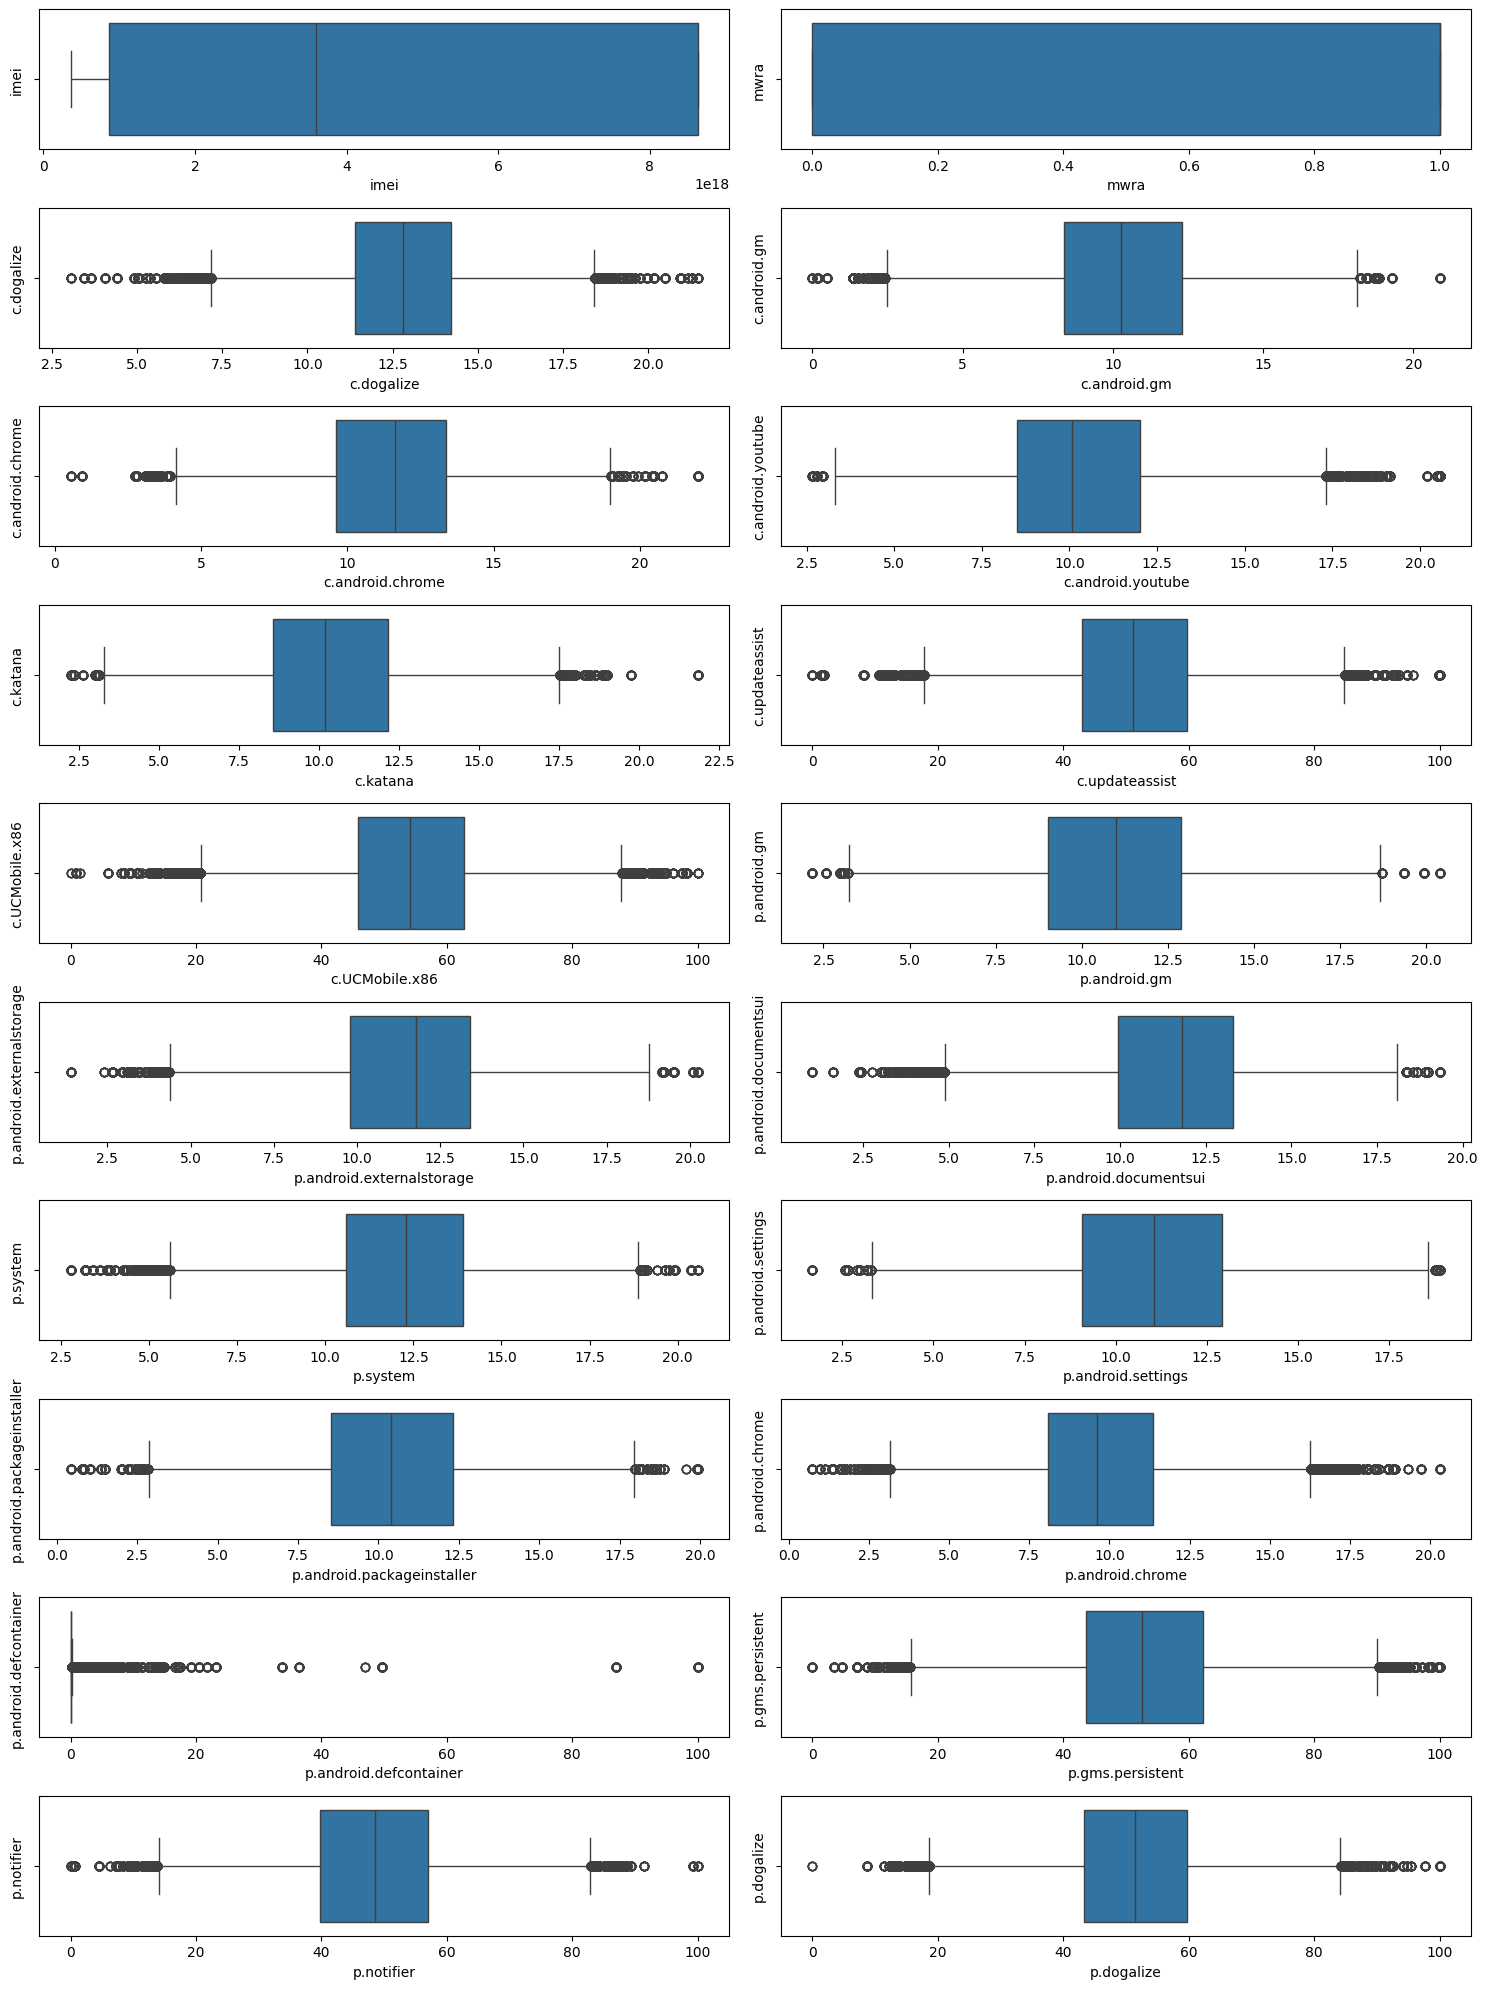

In [35]:
num_col = numeric_columns.columns
num_plots = len(num_col)
num_cols = 2
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 2))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(x=col, data=merged_data, ax=axes[i])
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Deskriptívne štatistiky

In [36]:
merged_data.describe()

,imei,mwra,c.dogalize,c.android.gm,c.android.chrome,c.android.youtube,c.katana,c.updateassist,c.UCMobile.x86,p.android.gm,p.android.externalstorage,p.android.documentsui,p.system,p.android.settings,p.android.packageinstaller,p.android.chrome,p.android.defcontainer,p.gms.persistent,p.notifier,p.dogalize
count,4.697470e+05,469747.000000,469747.000000,469747.000000,469747.000000,469747.000000,469747.000000,469747.000000,469747.000000,469747.000000,469747.000000,469747.000000,469747.000000,469747.000000,469747.000000,469747.000000,469747.000000,469747.000000,469747.000000,469747.000000
mean,3.985063e+18,0.629907,12.783779,10.322902,11.502412,10.334976,10.387252,51.252009,54.148925,10.973493,11.533336,11.531535,12.161937,10.986725,10.403970,9.781168,0.239491,52.896089,48.408024,51.515519
std,3.448867e+18,0.482830,2.110758,2.739077,2.637249,2.569781,2.511613,12.292998,12.678178,2.618895,2.575132,2.501014,2.435945,2.625882,2.616004,2.512839,1.750072,13.932549,12.500082,12.336406
min,3.590434e+17,0.000000,3.052220,0.000000,0.540450,2.671060,2.253590,0.000000,0.000000,2.180730,1.398780,1.030980,2.780780,1.681710,0.430540,0.745730,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.000000,11.389750,8.361320,9.629730,8.497410,8.579770,42.911780,45.892800,9.026360,9.781760,9.938630,10.580980,9.081740,8.537450,8.076920,0.003120,43.632110,39.809500,43.245670
50%,3.590434e+18,1.000000,12.808620,10.279230,11.617100,10.083910,10.208190,51.143830,54.060010,11.003010,11.769030,11.804030,12.290330,11.039300,10.384760,9.604980,0.021280,52.616650,48.504120,51.479070
75%,8.630331e+18,1.000000,14.206900,12.289980,13.371020,12.026670,12.151130,59.679210,62.679950,12.893220,13.392970,13.301620,13.901590,12.927010,12.307290,11.355430,0.106880,62.286830,57.034190,59.674280
max,8.630331e+18,1.000000,21.448640,20.873920,21.980650,20.558500,21.827390,100.000000,100.000000,20.395280,20.235780,19.323180,20.565560,18.888400,19.930570,20.294680,100.000000,100.000000,100.000000,100.000000


In [37]:
merged_data.describe(exclude=np.number)

,ts,store_name,code,location,company
count,469747,469635,469181,469635,469113
unique,14903,917,133,183,2460
top,2018-05-14 13:43:00,Zacoalco de Torres,US,America/New_York,Smith PLC
freq,384,1592,74987,32899,1046


### Mean, Median & Mode

In [38]:
for column in numeric_columns:
    mean_value = round(np.mean(merged_data[column]), 3)
    median_value = round(np.median(merged_data[column]), 3)
    mode_result = stats.mode(merged_data[column].dropna())
    try:
        mode_value = mode_result.mode[0]
    except IndexError: 
        mode_value = None
    mode_display = mode_value if mode_value is not None else "N/A"
    print(f"{column:30} -> Mean: {mean_value:>8}, Median: {median_value:>8}, Mode: {mode_display:>8}")

imei                           -> Mean: 3.985063011125576e+18, Median: 3.5904337993176617e+18, Mode:      N/A
mwra                           -> Mean:     0.63, Median:      1.0, Mode:      N/A
c.dogalize                     -> Mean:   12.784, Median:   12.809, Mode:      N/A
c.android.gm                   -> Mean:   10.323, Median:   10.279, Mode:      N/A
c.android.chrome               -> Mean:   11.502, Median:   11.617, Mode:      N/A
c.android.youtube              -> Mean:   10.335, Median:   10.084, Mode:      N/A
c.katana                       -> Mean:   10.387, Median:   10.208, Mode:      N/A
c.updateassist                 -> Mean:   51.252, Median:   51.144, Mode:      N/A
c.UCMobile.x86                 -> Mean:   54.149, Median:    54.06, Mode:      N/A
p.android.gm                   -> Mean:   10.973, Median:   11.003, Mode:      N/A
p.android.externalstorage      -> Mean:   11.533, Median:   11.769, Mode:      N/A
p.android.documentsui          -> Mean:   11.532, Median:   

In [39]:
for column in categorical_columns:
    mode_result = merged_data[column].dropna().mode()
    try:
        mode_value = mode_result[0]
    except IndexError: 
        mode_value = None
    mode_display = mode_value if mode_value is not None else "N/A"
    print(f"{column:10} -> Mode: {mode_display:>8}")

ts         -> Mode: 2018-05-14 13:43:00
store_name -> Mode: Zacoalco de Torres
code       -> Mode:       US
location   -> Mode: America/New_York
company    -> Mode: Smith PLC


### Skewness & Kurtosis

In [40]:
# Funkcia pre automaticke vyhodnotenie skewness
def evaluate_skewness(skewness: float) -> str:
    if -0.5 <= skewness <= 0.5:
        return "Fairly symmetrical"
    elif -1 < skewness < -0.5 or 0.5 < skewness < 1:
        return "Moderately skewed"
    elif skewness <= -1 or skewness >= 1:
        return "Highly skewed"
    else:
        return "Invalid value."

# Funkcia pre automaticke vyhodnotenie kurtosis
def evaluate_kurtosis(kurtosis: float) -> str:
    if kurtosis > 3:
        return "Kurtosis is positive."
    elif kurtosis < 3:
        return "Kurtosis is negative."


In [41]:
for column in numeric_columns:
    skewness_value = round(stats.skew(merged_data[column]), 3)
    kurtosis_value = round(stats.kurtosis(merged_data[column]), 3)
    skewness_eval = evaluate_skewness(skewness_value)
    kurtosis_eval = evaluate_kurtosis(kurtosis_value)
    
    print(f"Skewness: {skewness_value:>8} -> {skewness_eval:<18}, Kurtosis: {kurtosis_value:>8} -> {kurtosis_eval}")

Skewness:    0.396 -> Fairly symmetrical, Kurtosis:   -1.526 -> Kurtosis is negative.
Skewness:   -0.538 -> Moderately skewed , Kurtosis:    -1.71 -> Kurtosis is negative.
Skewness:   -0.046 -> Fairly symmetrical, Kurtosis:    0.187 -> Kurtosis is negative.
Skewness:   -0.008 -> Fairly symmetrical, Kurtosis:   -0.295 -> Kurtosis is negative.
Skewness:    -0.12 -> Fairly symmetrical, Kurtosis:   -0.235 -> Kurtosis is negative.
Skewness:    0.357 -> Fairly symmetrical, Kurtosis:   -0.109 -> Kurtosis is negative.
Skewness:    0.199 -> Fairly symmetrical, Kurtosis:   -0.242 -> Kurtosis is negative.
Skewness:    0.033 -> Fairly symmetrical, Kurtosis:   -0.002 -> Kurtosis is negative.
Skewness:   -0.013 -> Fairly symmetrical, Kurtosis:    0.076 -> Kurtosis is negative.
Skewness:   -0.026 -> Fairly symmetrical, Kurtosis:   -0.441 -> Kurtosis is negative.
Skewness:   -0.231 -> Fairly symmetrical, Kurtosis:   -0.302 -> Kurtosis is negative.
Skewness:   -0.394 -> Fairly symmetrical, Kurtosis:   

## C

### Párová analýza: continuous - continuous

In [42]:
numeric_columns.corr()

,imei,mwra,c.dogalize,c.android.gm,c.android.chrome,c.android.youtube,c.katana,c.updateassist,c.UCMobile.x86,p.android.gm,p.android.externalstorage,p.android.documentsui,p.system,p.android.settings,p.android.packageinstaller,p.android.chrome,p.android.defcontainer,p.gms.persistent,p.notifier,p.dogalize
imei,1.000000,-0.010176,-0.000123,-0.022145,-0.016018,0.002050,0.022272,-0.004246,-0.009393,-0.006228,0.019171,0.032562,-0.012634,0.010922,0.004539,0.016721,-0.005899,-0.003441,0.006096,-0.001307
mwra,-0.010176,1.000000,0.002164,0.268106,0.547228,0.276361,-0.569085,0.007232,-0.006525,0.001854,-0.286751,-0.295805,0.299325,-0.008242,-0.535950,-0.295007,-0.063601,0.023241,-0.012347,0.000408
c.dogalize,-0.000123,0.002164,1.000000,0.067292,0.154373,-0.002736,0.028868,-0.008058,-0.017102,-0.118562,0.124212,-0.170333,0.116682,-0.149075,0.262081,-0.133329,0.021022,-0.003293,0.012573,-0.011444
c.android.gm,-0.022145,0.268106,0.067292,1.000000,0.321597,-0.055529,-0.150950,0.014697,-0.010629,0.410604,-0.366236,-0.570978,0.002131,-0.304538,-0.199637,0.054833,-0.047780,0.036058,-0.009540,0.003287
c.android.chrome,-0.016018,0.547228,0.154373,0.321597,1.000000,0.423927,-0.479253,0.007400,-0.006887,0.007353,-0.207491,-0.341732,0.317031,-0.013927,-0.372735,-0.266421,-0.044005,0.014522,-0.018392,-0.002200
c.android.youtube,0.002050,0.276361,-0.002736,-0.055529,0.423927,1.000000,-0.208093,-0.009808,-0.006024,-0.239820,0.199096,0.106273,0.183807,0.524614,-0.186837,0.039784,0.008526,-0.009673,-0.018563,0.001564
c.katana,0.022272,-0.569085,0.028868,-0.150950,-0.479253,-0.208093,1.000000,0.000769,0.000426,0.117921,0.054371,0.360526,-0.353332,-0.075580,0.404669,0.266400,0.012299,-0.009245,0.003748,0.012416
c.updateassist,-0.004246,0.007232,-0.008058,0.014697,0.007400,-0.009808,0.000769,1.000000,0.000353,0.008293,-0.010274,-0.006771,-0.014313,-0.025651,-0.003866,0.005351,-0.013972,0.006341,0.002799,-0.004065
c.UCMobile.x86,-0.009393,-0.006525,-0.017102,-0.010629,-0.006887,-0.006024,0.000426,0.000353,1.000000,0.002552,0.000123,0.013144,-0.004751,-0.005426,-0.000374,0.018104,0.003871,0.000086,0.000859,0.013191
p.android.gm,-0.006228,0.001854,-0.118562,0.410604,0.007353,-0.239820,0.117921,0.008293,0.002552,1.000000,-0.322843,-0.345933,-0.336288,-0.100167,-0.044136,-0.157480,-0.005232,0.015415,-0.008237,0.017850


<Axes: >

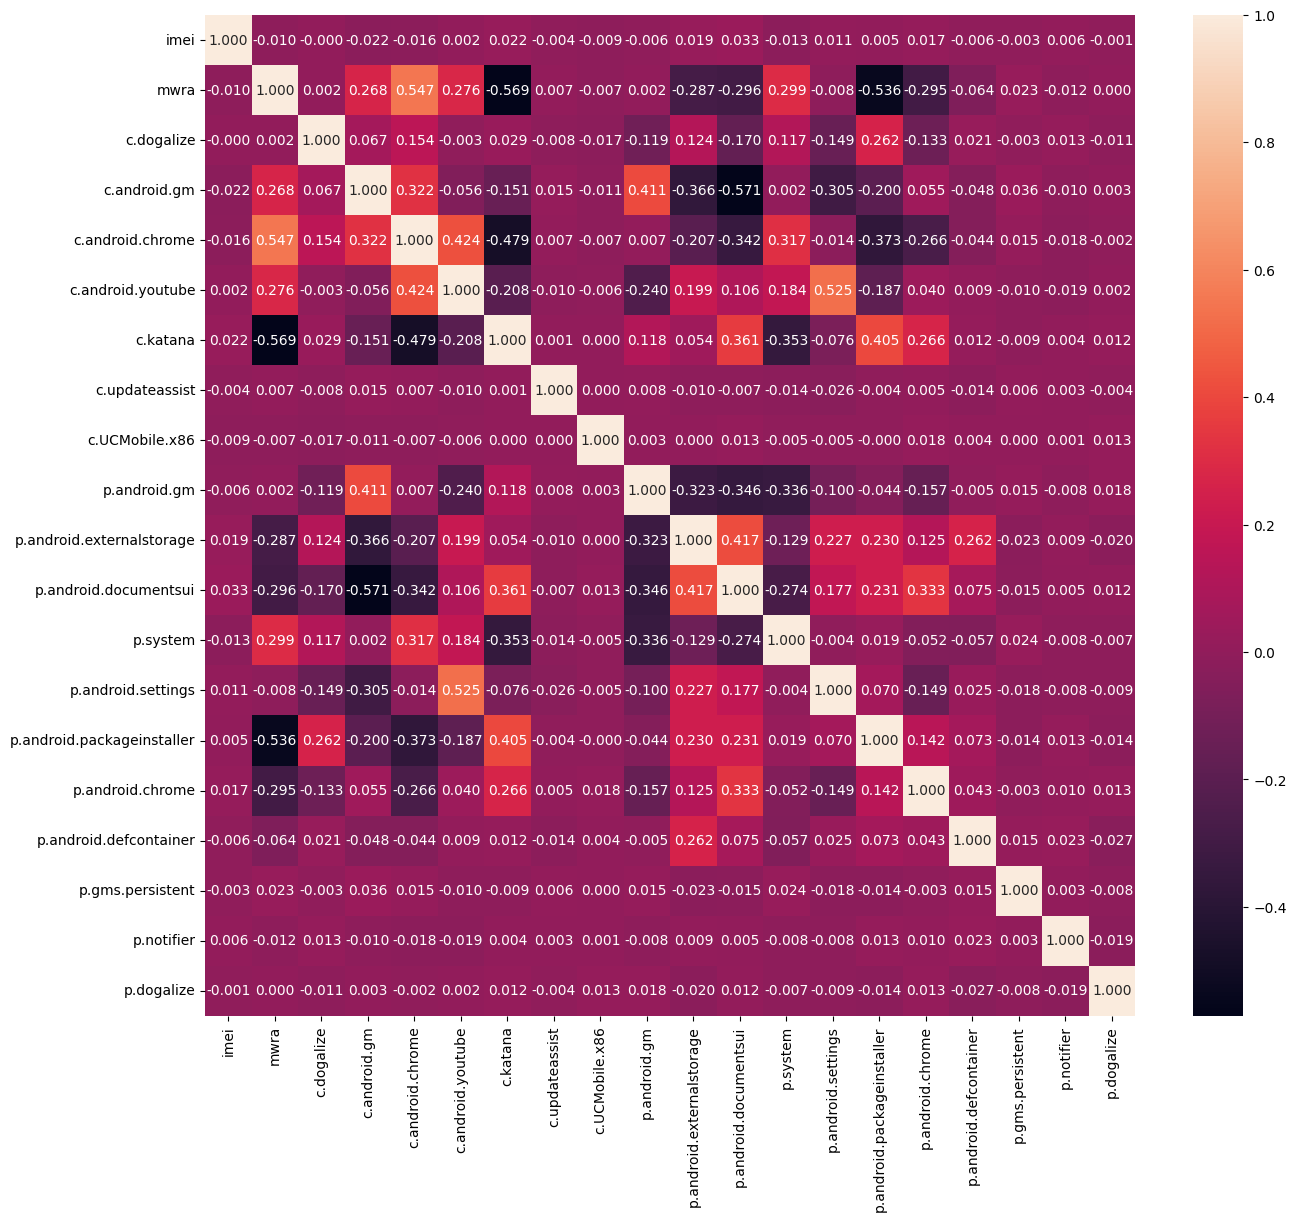

In [43]:
fig, ax = plt.subplots(figsize=(15,13))
sns.heatmap(numeric_columns.corr(), ax=ax, annot=True, fmt=".3f")

In [44]:
corr_columns = [
    "mwra", "c.android.chrome", "c.android.gm", "c.android.youtube", "c.katana", "p.android.gm", "p.android.externalstorage",
    "p.android.documentsui", "p.system", "p.android.settings", "p.android.packageinstaller", "p.android.chrome"
]

corr_df = merged_data[corr_columns]

In [45]:
"""
sns.pairplot(corr_df)
plt.tight_layout()
plt.show()
"""

'\nsns.pairplot(corr_df)\nplt.tight_layout()\nplt.show()\n'

### Párová analýza: continuous - categorical

In [46]:
"""
fig, axes = plt.subplots(len(numeric_columns), len(categorical_columns), figsize=(15, len(numeric_columns) * 5))

# Flatten the axes array in case it's 2D
axes = axes.flatten()

# Iterate over each numeric and categorical column combination
for i, (ncol, ccol) in enumerate([(ncol, ccol) for ncol in numeric_columns for ccol in categorical_columns]):
    sns.boxplot(x=ccol, y=ncol, data=merged_data, ax=axes[i])
    axes[i].set_title(f'{ncol} vs {ccol}')
    axes[i].set_xlabel(ccol)
    axes[i].set_ylabel(ncol)

# Adjust layout
plt.tight_layout()
plt.show()
"""

"\nfig, axes = plt.subplots(len(numeric_columns), len(categorical_columns), figsize=(15, len(numeric_columns) * 5))\n\n# Flatten the axes array in case it's 2D\naxes = axes.flatten()\n\n# Iterate over each numeric and categorical column combination\nfor i, (ncol, ccol) in enumerate([(ncol, ccol) for ncol in numeric_columns for ccol in categorical_columns]):\n    sns.boxplot(x=ccol, y=ncol, data=merged_data, ax=axes[i])\n    axes[i].set_title(f'{ncol} vs {ccol}')\n    axes[i].set_xlabel(ccol)\n    axes[i].set_ylabel(ncol)\n\n# Adjust layout\nplt.tight_layout()\nplt.show()\n"

## D

In [47]:
#merged_con_dev = pd.merge(connections, devices, on="imei", how="outer")
#merged_con_dev_proc = pd.merge(merged_con_dev, processes, on=["imei", "mwra"], how="outer")
#merged_data = pd.merge(merged_con_dev_proc, profiles, on="imei", how="inner")
#merged_data.head()

In [48]:
#cars_numeric = cars.drop(columns=['abbrev'])
#numeric_columns = merged_data.select_dtypes(include='number')
#corr_matrix = numeric_columns.corr()

#plt.figure(figsize=(18, 14))
#sns.heatmap(corr_matrix, annot=True,  fmt='.2f', cmap="coolwarm", center=0, annot_kws={"size": 8})
#plt.show()

## E

# 1.2 Identifikácia problémov, integrácia a čistenie dát

## A

## B

## C

# 1.3 Formulácia a štatistické overenie hypotéz o dátach

## A

## B